# 載入所需套件

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.decomposition import PCA
from datetime import datetime
from tqdm import tqdm

%matplotlib inline

style.use('seaborn')

# 抓取股價資料

In [2]:
start=datetime(2017,1,1)
end=datetime.now().date()
tickers=['IBM','MSFT','FB','AMZN','AAPL','NFLX','INTC','GOOG','NVDA','TWTR']
adj_close={}

for ticker in tqdm(tickers):
    adj_close[ticker]=pdr.DataReader(ticker,'yahoo',start,end)['Adj Close']

adj_close_df=pd.DataFrame(adj_close)
return_df=adj_close_df.pct_change()[1:]
return_df.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.09it/s]


,IBM,MSFT,FB,AMZN,AAPL,NFLX,INTC,GOOG,NVDA,TWTR
Date,,,,,,,,,,
2017-01-04,0.012381,-0.004474,0.015660,0.004657,-0.001119,0.015060,-0.005191,0.000967,0.023331,0.025547
2017-01-05,-0.003308,0.000000,0.016682,0.030732,0.005085,0.018546,-0.001648,0.009048,-0.025385,0.013642
2017-01-06,0.004920,0.008668,0.022707,0.019912,0.011148,-0.005614,0.003576,0.015277,0.013367,0.004681
2017-01-09,-0.011090,-0.003183,0.012074,0.001168,0.009159,-0.000916,0.003564,0.000620,0.040543,0.019220
2017-01-10,-0.012705,-0.000319,-0.004404,-0.001280,0.001009,-0.008095,-0.001912,-0.002306,-0.007550,-0.007429


In [3]:
X=return_df.values
[n,m]=X.shape
print('The number of timestamps is {}'.format(n))
print('The number of stocks is {}'.format(m))

The number of timestamps is 941
The number of stocks is 10


# 建立PCA降維模型

In [4]:
num_pc=6
pca=PCA(n_components=num_pc)
pca.fit(X)

percentage=pca.explained_variance_ratio_
percentage_cum=np.cumsum(percentage)
pca_components=pca.components_

print('{:5.2f}% of the variance is explained by the first {} PCs'.format(percentage_cum[-1]*100,num_pc))

92.15% of the variance is explained by the first 6 PCs


# 繪製主成分重要性

(0.0, 100.0)

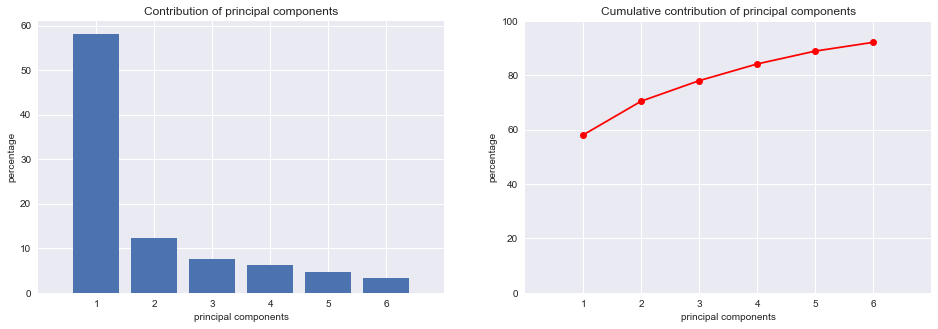

In [5]:
x=np.arange(1,len(percentage)+1,1)

fig,axes=plt.subplots(1,2,figsize=(16,5))
axes[0].bar(x,percentage*100,align='center')
axes[0].set_title('Contribution of principal components',fontsize=12)
axes[0].set_xlabel('principal components',fontsize=10)
axes[0].set_ylabel('percentage',fontsize=10)
axes[0].set_xticks(x) 
axes[0].set_xlim([0,num_pc+1])

axes[1].plot(x,percentage_cum*100,'ro-')
axes[1].set_title('Cumulative contribution of principal components',fontsize=12)
axes[1].set_xlabel('principal components',fontsize=10)
axes[1].set_ylabel('percentage',fontsize=10)
axes[1].set_xticks(x) 
axes[1].set_xlim([0,num_pc+1])
axes[1].set_ylim([0,100])

# 主成分報酬率

In [6]:
factor_return=X.dot(pca_components.T)
factor_return=pd.DataFrame(columns=['factor {}'.format(i+1) for i in range(num_pc)],index=return_df.index,data=factor_return)
factor_return.head()

,factor 1,factor 2,factor 3,factor 4,factor 5,factor 6
Date,,,,,,
2017-01-04,-0.031082,-0.012542,-0.002918,-0.018294,-0.005199,0.002509
2017-01-05,-0.015963,-0.010448,-0.037778,0.017562,-0.009533,-0.000562
2017-01-06,-0.030152,0.005656,0.003879,0.007432,-0.022420,-0.001366
2017-01-09,-0.030634,-0.005023,0.017026,-0.028803,-0.010106,-0.010545
2017-01-10,0.014102,0.001521,0.000454,0.001683,-0.002974,-0.003929


# 主成分特徵

In [7]:
factor_exposure=pd.DataFrame(index=['factor {}'.format(i+1) for i in range(num_pc)],columns=return_df.columns,data=pca_components).T
factor_exposure

,factor 1,factor 2,factor 3,factor 4,factor 5,factor 6
IBM,-0.191290,0.069039,0.205927,0.359538,0.132490,0.513917
MSFT,-0.288059,0.113215,0.018035,0.225494,-0.021996,0.150267
FB,-0.296510,0.031146,-0.155346,0.170898,-0.616051,-0.552291
AMZN,-0.271475,0.135013,-0.263916,0.066142,-0.181530,0.233621
AAPL,-0.287100,0.126684,0.071257,0.256186,-0.158241,0.228790
NFLX,-0.318508,0.201341,-0.739209,-0.242227,0.414535,-0.004010
INTC,-0.303960,0.103752,0.288801,0.370654,0.576196,-0.536533
GOOG,-0.269223,0.046297,-0.054134,0.180232,-0.180037,0.100905
NVDA,-0.453871,0.284225,0.475013,-0.692392,-0.060691,0.018022
TWTR,-0.405053,-0.901631,-0.001719,-0.112802,0.067182,0.054498


# 個股二維平面主成分分布圖

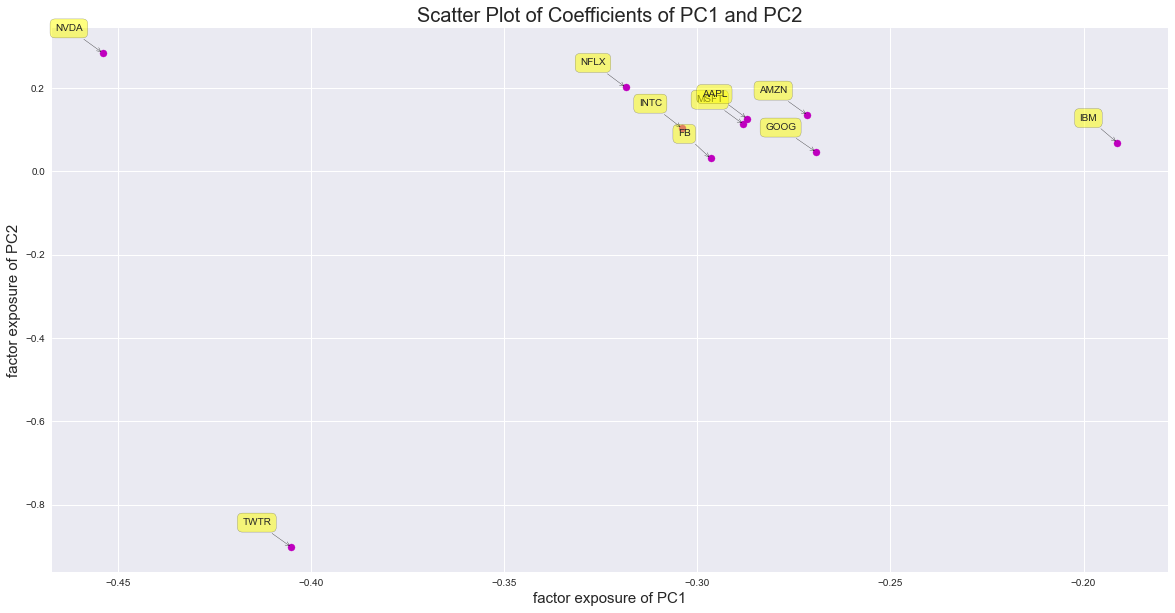

In [8]:
labels=factor_exposure.index
data=factor_exposure.values

fig,ax=plt.subplots(1,figsize=(20,10))
ax.scatter(data[:,0],data[:,1],marker='o',s=50,c='m',cmap=plt.cm.Spectral)
ax.set_title('Scatter Plot of Coefficients of PC1 and PC2',fontsize=20)
ax.set_xlabel('factor exposure of PC1',fontsize=15)
ax.set_ylabel('factor exposure of PC2',fontsize=15)

for label,x,y in zip(labels,data[:,0],data[:,1]):
    ax.annotate(label,xy=(x,y),xytext=(-20,20),textcoords='offset points',ha='right',va='bottom',
                bbox=dict(boxstyle='round,pad=0.5',fc='yellow',alpha=0.5),
                arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=0'))